# Clustering crypto stock data

## Data exploration

In [109]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [110]:
# data
data = pd.read_csv('crypto_market_data.csv')
data.set_index('coin_id', inplace = True)     #set index to coin id
data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [111]:
# Scaled data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data.set_index(data.index, inplace = True)
scaled_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [112]:
# summary
scaled_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,0.000000,1.895503e-16,2.707861e-17,2.978647e-17,-5.415722e-18,-1.326852e-16,4.197185e-17
std,1.012423,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00
min,-4.981042,-1.682027e+00,-2.217108e+00,-1.393153e+00,-9.560487e-01,-5.511464e-01,-2.963296e-01
25%,-0.127467,-7.066688e-01,-6.299628e-01,-4.605580e-01,-5.517599e-01,-4.998478e-01,-2.817468e-01
50%,0.077497,-1.906843e-01,-9.190922e-03,-6.103015e-02,-1.592496e-01,-3.550537e-01,-2.255326e-01
75%,0.331280,4.931931e-01,6.435649e-01,1.165382e-01,1.606038e-02,-4.736110e-02,-1.454693e-01
max,1.919812,2.572251e+00,2.907054e+00,5.351455e+00,4.769913e+00,4.632380e+00,6.088625e+00


In [113]:
# plot scaled data
scaled_data.hvplot.line(
    rot = 90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

### Find the best k value using the scaled data
- Using KMeans clustering and it's inertia to determine the best value for the number of clusters.

In [114]:
# Finding inertia values
k_val_list = list(range(1,11))
inertia = []
for i in k_val_list:
  k_model = KMeans(n_clusters = i)
  k_model.fit(scaled_data)
  inertia.append(k_model.inertia_)


/Users/alisonandrade/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alisonandrade/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alisonandrade/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alisonandrade/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

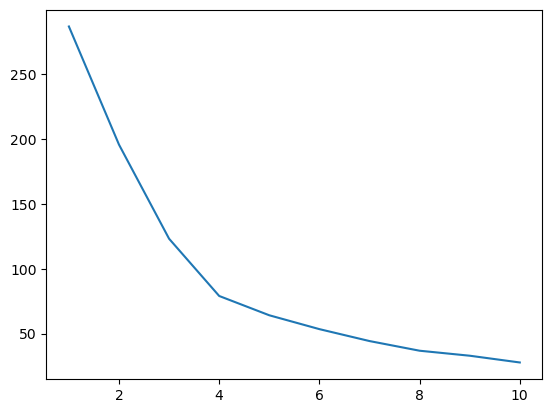

In [115]:
# Plotting inertia values
plt.plot(k_val_list, inertia)

The best value for the number of clusters is n=4.

### Clustering Cryptocurrencies with n=4.

In [116]:
# Training the KMeans model on 4 clusters
model = KMeans(n_clusters=4)
model.fit(scaled_data)
y_pred = model.predict(scaled_data)

/Users/alisonandrade/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [117]:
scaled_data['k_val'] = y_pred
scaled_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,k_val
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [118]:
scaled_data.dtypes

price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
k_val                             int32
dtype: object

In [119]:
scaled_data.hvplot.scatter(
    x = 'price_change_percentage_24h',
    y = 'price_change_percentage_7d',
    c = scaled_data['k_val'],
    colorbar = False,
    cmap = 'viridis',
    hover_cols = ['coin_id'],
    title = 'K-Means predictions with n_clusters = 4, for scaled data'
)


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,_color,coin_id)

### Optimizing clusters with PCA

In [120]:
# initializing the pca model
pca = PCA(n_components=3)

In [121]:
# reducing the variables with pca
pca_df = pd.DataFrame(pca.fit_transform(scaled_data), columns=['PC1', 'PC2', 'PC3'], index = scaled_data.index)
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.989271,0.715160,0.493822
ethereum,-0.801150,0.386863,1.010012
tether,-0.257238,-0.294368,-0.715437
ripple,-0.289312,-0.354596,-0.561213
bitcoin-cash,-1.849888,1.754733,1.711689


In [53]:
pca.explained_variance_ratio_
print (f'the total explained variance of the three principle components is {pca.explained_variance_ratio_.sum()}')

the total explained variance of the three principle components is 0.8891533061505712


### Find the best value for k using the PCA data

In [54]:
# Loop through the pca dataframe to find best k values
k_val_list_pca = list(range(1, 11))
inertia_pca = []
for i in k_val_list_pca:
  k_model = KMeans(n_clusters=i)
  k_model.fit(pca_df)
  inertia_pca.append(k_model.inertia_)

/Users/alisonandrade/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alisonandrade/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alisonandrade/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alisonandrade/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

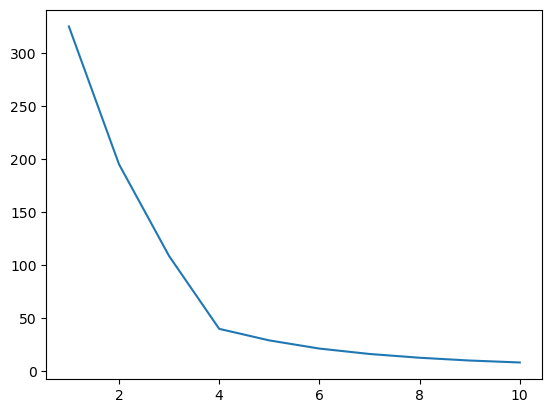

In [55]:
plt.plot(k_val_list_pca, inertia_pca)

The best value for k using PCA is 4. This does not change from finding the k value from the scaled original data.

In [56]:
# Predicting pca dataframe to kmeans
model = KMeans(n_clusters=4)
model.fit(pca_df)
y_pred = model.predict(pca_df)

/Users/alisonandrade/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [57]:
# Predicted k values for pca dataframe
final_pca_df = pca_df.copy()
final_pca_df['k_val'] = y_pred
final_pca_df.set_index(scaled_data.index, inplace = True)
final_pca_df.head()

,PC1,PC2,PC3,k_val
coin_id,,,,
bitcoin,2.059139,-0.536684,-0.438238,0
ethereum,1.956401,-0.410821,-1.016966,0
tether,-0.990142,-0.454228,0.690021,1
ripple,-0.973189,-0.494650,0.551234,1
bitcoin-cash,3.330367,-1.022311,-0.501341,0


In [60]:
# Plotting pca dataframe k values with PC1 and PC2
final_pca_df.hvplot.scatter(
    x = 'PC1',
    y = 'PC2',
    c = final_pca_df['k_val'],
    colorbar = False,
    cmap = 'viridis',
    hover_cols = ['coin_id'],
    title = 'K-Means predictions with n_clusters = 4, using PCA'
)


:Scatter   [PC1]   (PC2,_color,coin_id)

Text(0, 0.5, 'Inertia')

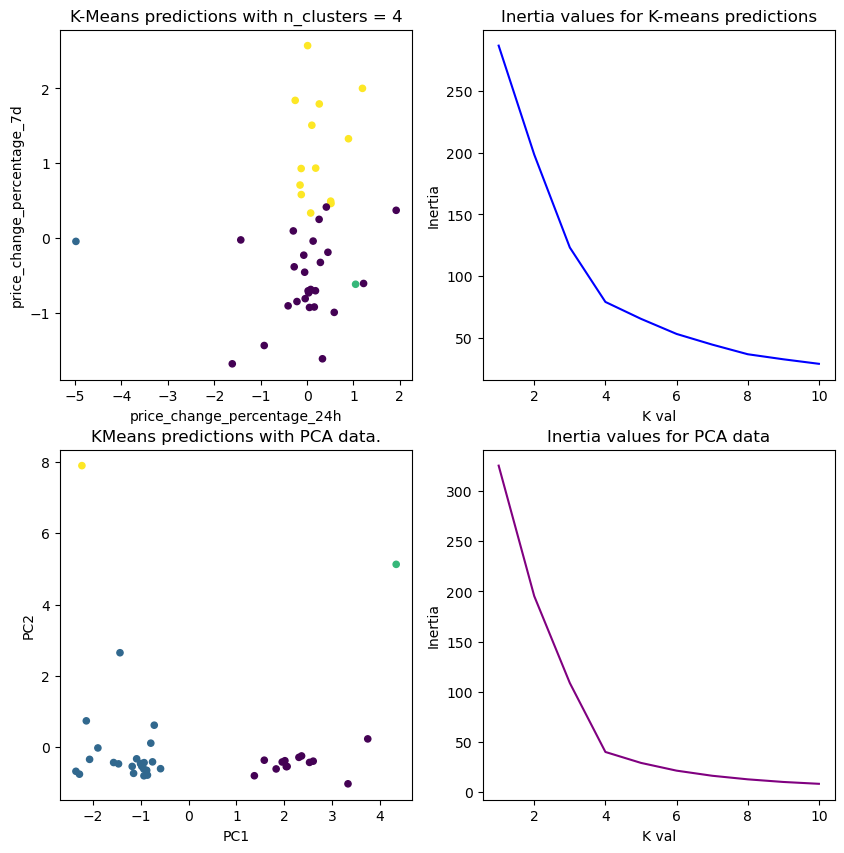

In [62]:
# creating the subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# height, width
fig.set_figheight(10)
fig.set_figwidth(10)

#plotting
scaled_data.plot.scatter(ax = axes[0, 0],
    x = 'price_change_percentage_24h',
    y = 'price_change_percentage_7d',
    c = scaled_data['k_val'].values.tolist(),
    title = 'K-Means predictions with n_clusters = 4'
)

final_pca_df.plot.scatter(ax = axes[1, 0],
    x = 'PC1',
    y = 'PC2',
    c = final_pca_df['k_val'].values.tolist(),
    title = 'KMeans predictions with PCA data.'
)

axes[0, 1].plot(
    k_val_list,
    inertia,
    color = 'blue'
)

axes[0, 1].set_title('Inertia values for K-means predictions')
axes[0, 1].set_xlabel('K val')
axes[0, 1].set_ylabel('Inertia')

axes[1, 1].plot(
    k_val_list_pca,
    inertia_pca,
    color = 'purple',
)
axes[1, 1].set_title('Inertia values for PCA data')
axes[1, 1].set_xlabel('K val')
axes[1, 1].set_ylabel('Inertia')

After analyzing the results, using fewer clusters show that the PCA model groups the data more effectively, from a visual analysis, as the inertia appears to change faster around k=4. The number of clusters do not change, however, it is more effective in clustering the data.

In [103]:
# creating DataFrame to store separated k values
clustered_df = pd.DataFrame(columns = ['k = 0', 'k = 1', 'k = 2', 'k = 3'], index=list(range(0, 26)))

# appending coin_id to k values to see the groups
for i in range(0, 4):
    k_val = final_pca_df[final_pca_df['k_val'] == i].index
    for j, k in enumerate(k_val):
        clustered_df['k = ' + str(i)][j] = k

# cleaning
clustered_df[clustered_df.isna()] = ''

# display
clustered_df

,k = 0,k = 1,k = 2,k = 3
0,bitcoin,tether,celsius-degree-token,ethlend
1,ethereum,ripple,,
2,bitcoin-cash,bitcoin-cash-sv,,
3,binancecoin,crypto-com-chain,,
4,chainlink,usd-coin,,
5,cardano,eos,,
6,litecoin,tron,,
7,monero,okb,,
8,tezos,stellar,,
9,cosmos,cdai,,
